<a href="https://colab.research.google.com/github/navinsinghdo/credit-card-default-prediction/blob/main/Credit_Card_Default_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title** - Predicting whether a customer will default on his/her credit card

 **Problem Description** -  

 This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments.

**Data Description** -

**Attribute Information**-

This research employed abinary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explainatory variables:



*   X1: Amount of the given credit(NT dollar): it includes both the individual
    consumer credit and his/her family (supplementary) credit.
*   X2: Gender(1 = male; 2 = female).


*   X3: Education(1 = graduate school; 2 = university; 3 = high school;         
    4 = others).
*   X4: Marital status(1 = married; 2 = single; 3 = others).

*   X5: Age(year)
*   X6 - X11:Payment history of the customer
             the repayment status in September, 2005 (X6)
             the repayment status in August, 2005 (X7)
             the repayment status in July, 2005 (X8)
             the repayment status in June, 2005 (X9)
             the repayment status in May, 2005 (X10)
             the repayment status in April, 2005 (X11)

*   X12 - X17:Amount of bill statement(NT dollar)
              X12: amount of bill in September, 2005
              X13: amount of bill in August, 2005
              X14: amount of bill in July, 2005
              X15: amount of bill in June, 2005
              X16: amount of bill in May, 2005
              X17: amount of bill in April, 2005
*   X18 - X23:Amount of previous payment(NT dollar)
              X18: amount paid in September, 2005
              X19: amount paid in August, 2005
              X20: amount paid in July, 2005
              X21: amount paid in June, 2005
              X22: amount paid in May, 2005
              X23: amount paid in April, 2005



**OBJECTIVE**

Objective of my project is to predict which customer might default in upcoming months. Let's have a quick look on definition of what actually meant by Credit Card default.


*   A small plastic credit card issued by a bank, buikding society, etc.,
    allowing the holder to purchase goods or services on credit. We all are aware what is credit card. It is type of payme nt card which charges are made against a line of credit instead of the account holders cash deposits When some one uses credit card to make a purchase , that person's account accures a balance that must be paid off each month.
*   Credit card default happens when you have become severly delinquent on your
    credit card payments. Default is a serious credit card status that affects not only your standing withnthat credit card issuer but also your credit standing in general and your ability to get approved for other credit-based services.



IMPORTING LIBRARIES

In [3]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

import gc
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind_from_stats

from datetime import datetime
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from plotly.subplots import make_subplots
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import warnings
warnings.filterwarnings("ignore")

**LOADING DATASET**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cc_df = pd.read_csv('/content/drive/MyDrive/Default_of_credit_card_clients.csv')

# **DATA INSPECTION**

In [6]:
#Displaying first 5 rows
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
#Displaying last 5 rows
cc_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [8]:
#getting the shape of the data se
cc_df.shape

(30000, 25)

In [9]:
#checking the basic informations in the dataset
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [10]:
#checking the feature names in the dataset
cc_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
#print the unique values
cc_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [12]:
#looking for the description of the data set to get an insight of data
cc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


**Features in dataset**

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1 = male, 2 = female)

EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

**DATA PREPARATION**

In [13]:
#checking missing values count
cc_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [14]:
cc_df.duplicated().sum()

0

There are no duplicate values present in our dataset

# **Exploratory Data Analysis**

**Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations**.

**Analysis of dependent variable**

In [15]:
#renaming for better convenience
cc_df.rename(columns={'default payment next month' : 'default_payment_next_month'}, inplace=True)

In [16]:
# counts the dependent variable data set
cc_df['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [17]:
cc_df['default_payment_next_month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default_payment_next_month, dtype: float64

<Axes: xlabel='default_payment_next_month', ylabel='count'>

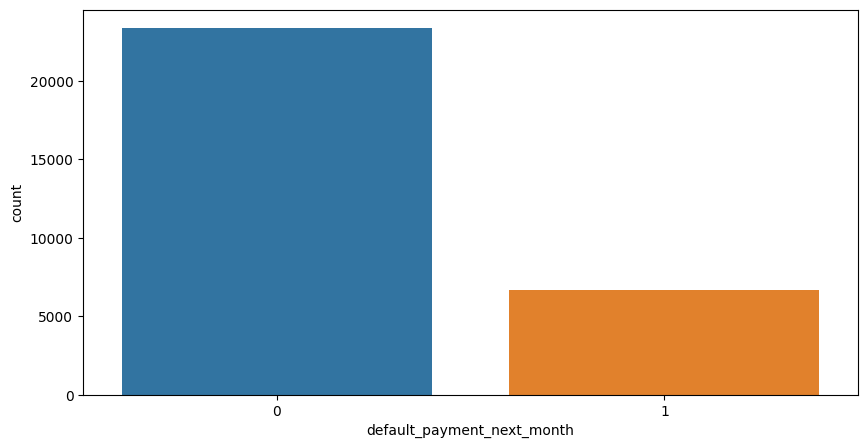

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'default_payment_next_month', data = cc_df)

**Observations**

0- not default

1- defaut

from the above graph we can understand that

About 22% people are expected to default next month and 77.8% are not expected to default
Defaulters are less than non defaulters in the given dataset .
so both the classes are not in proportion so we have to work on that to normalize the data

**Analysis of independent varibles**

We have few categorical features in dataset

1.sex

2.education

3.marriage

4.age

**1.Gender relationship**

1.male

2.female

In [19]:
#checking the counts
cc_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

<Axes: xlabel='SEX', ylabel='count'>

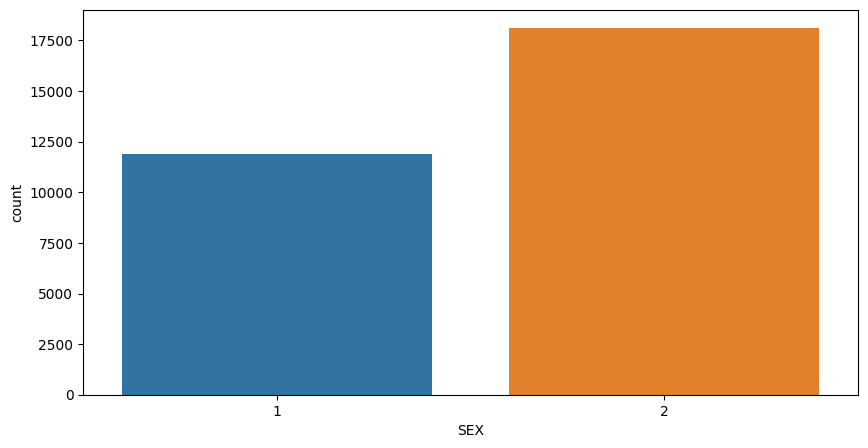

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'SEX', data = cc_df)

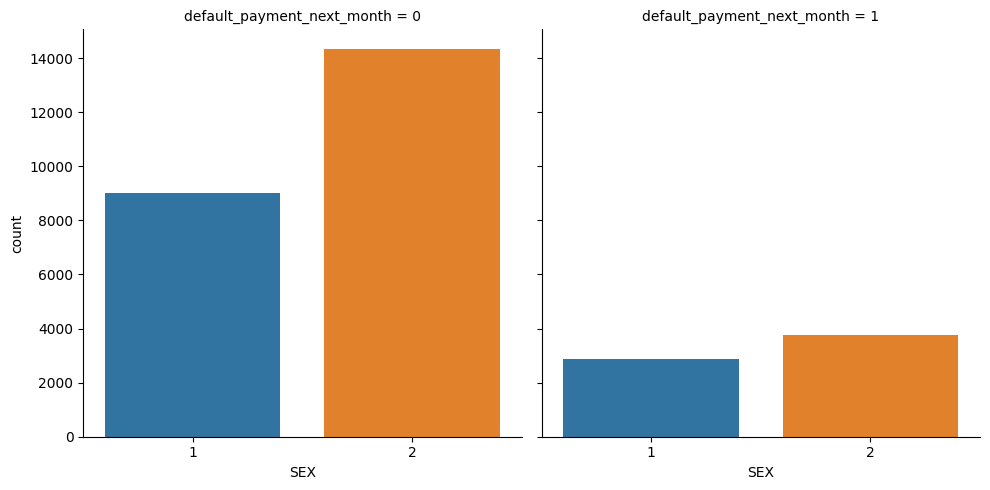

In [21]:
g = sns.catplot(x="SEX", col="default_payment_next_month",
                data=cc_df, kind="count");

**Observations**

1.male

2.female

Here we can undersatnd that most of the credit users are females

**2.Education**

1 = graduate school; 2 = university; 3 = high school; 0 = others

In [22]:
# checking counts the education  data set variable data set
cc_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [23]:
fil = (cc_df['EDUCATION'] == 5) | (cc_df['EDUCATION'] == 6) | (cc_df['EDUCATION'] == 4)
cc_df.loc[fil, 'EDUCATION'] = 0
cc_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [24]:
cc_df["EDUCATION"].value_counts(normalize=True)

2    0.467667
1    0.352833
3    0.163900
0    0.015600
Name: EDUCATION, dtype: float64

<Axes: xlabel='EDUCATION', ylabel='count'>

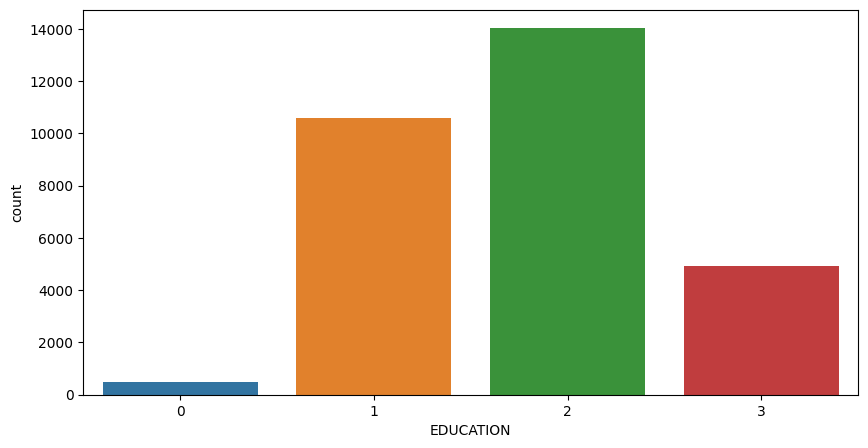

In [25]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'EDUCATION', data = cc_df)

**Observations**

From the above data analysis we can say that

More number of credit holders are university students ie around 47 percentage followed by Graduates and then High school students

**Marriage**

1 = married; 2 = single; 3 = others

In [26]:
#Checking Counts
#Marital status (1 = married; 2 = single; 3&0 = others).
cc_df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [27]:
fil = cc_df['MARRIAGE'] == 0
cc_df.loc[fil, 'MARRIAGE'] = 3
cc_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [28]:
cc_df["MARRIAGE"] = cc_df["MARRIAGE"].replace({0:3})
cc_df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

<Axes: xlabel='MARRIAGE', ylabel='count'>

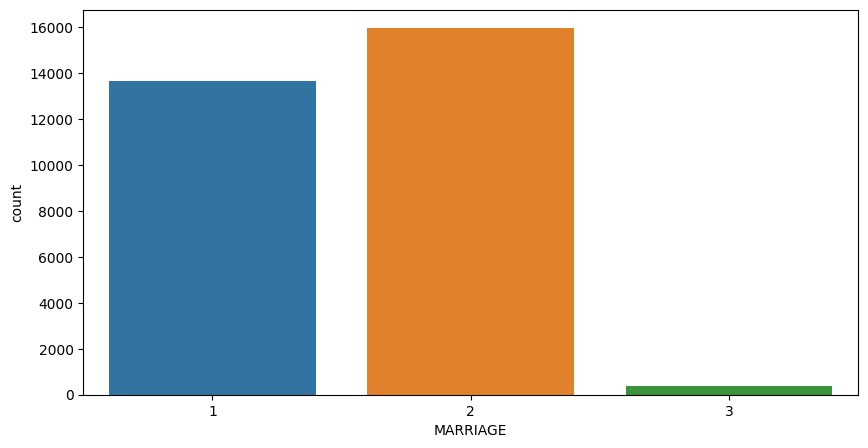

In [29]:
#plotting the graph of marriage
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = cc_df)

**Observations**

from the above plot we can understand that most of the credit card users are single

**Age**

**plotting graph according to age of the users irrespective of gender**

In [30]:
cc_df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [31]:
cc_df['AGE']=cc_df['AGE'].astype('int')

<Axes: xlabel='index', ylabel='AGE'>

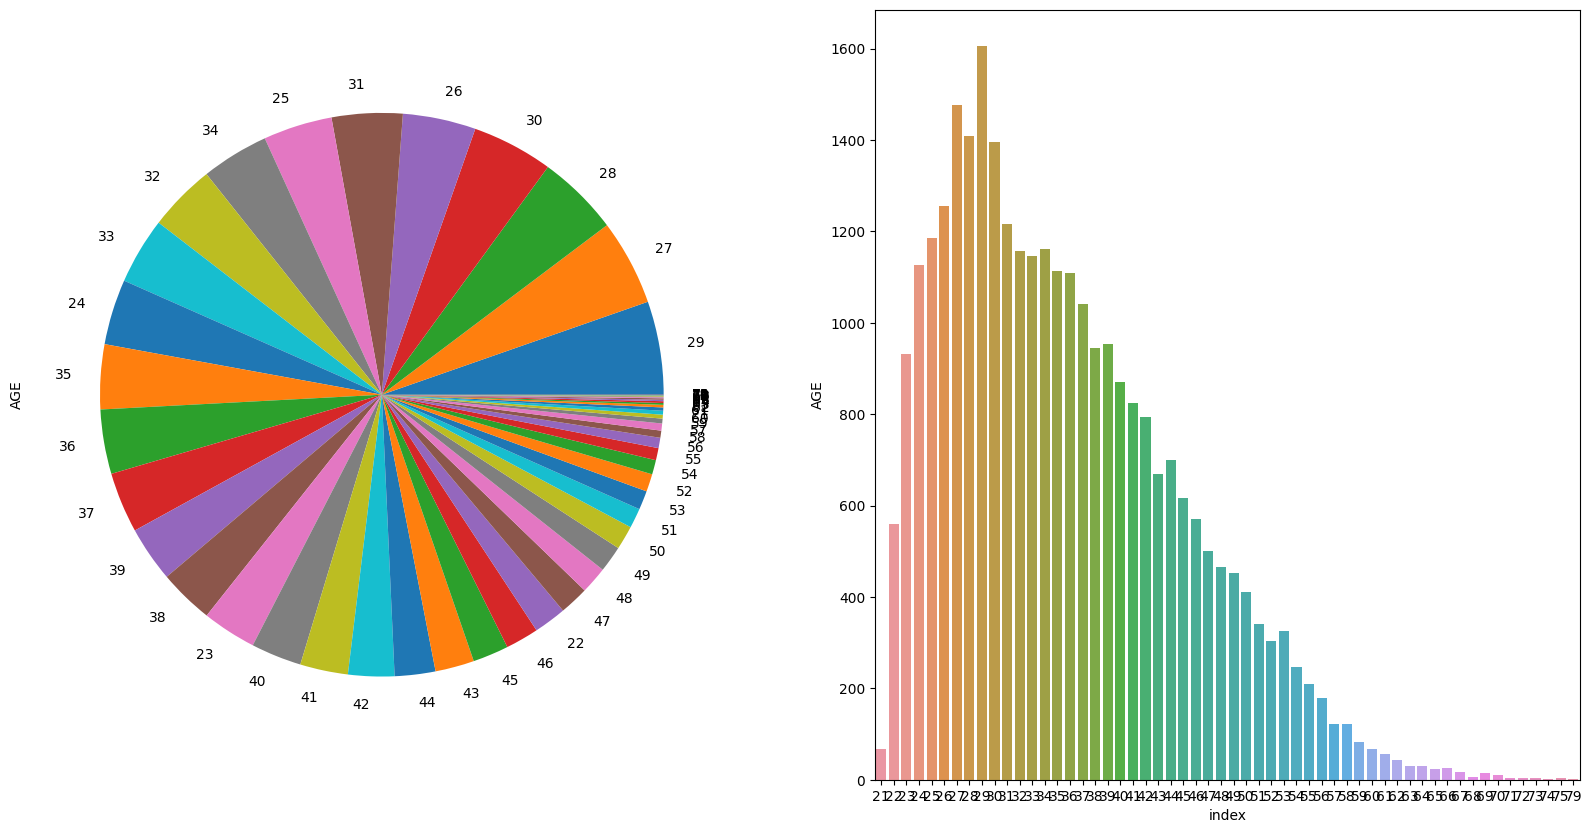

In [32]:
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
Day_df=cc_df['AGE'].value_counts().reset_index()
cc_df['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='AGE',data=Day_df,ax = axes[1],orient='v')

In [33]:
#check the mean of the age group rescpective to the default_payment_next_month
cc_df.groupby('default_payment_next_month')['AGE'].mean()

default_payment_next_month
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [34]:
cc_df = cc_df.astype('int')

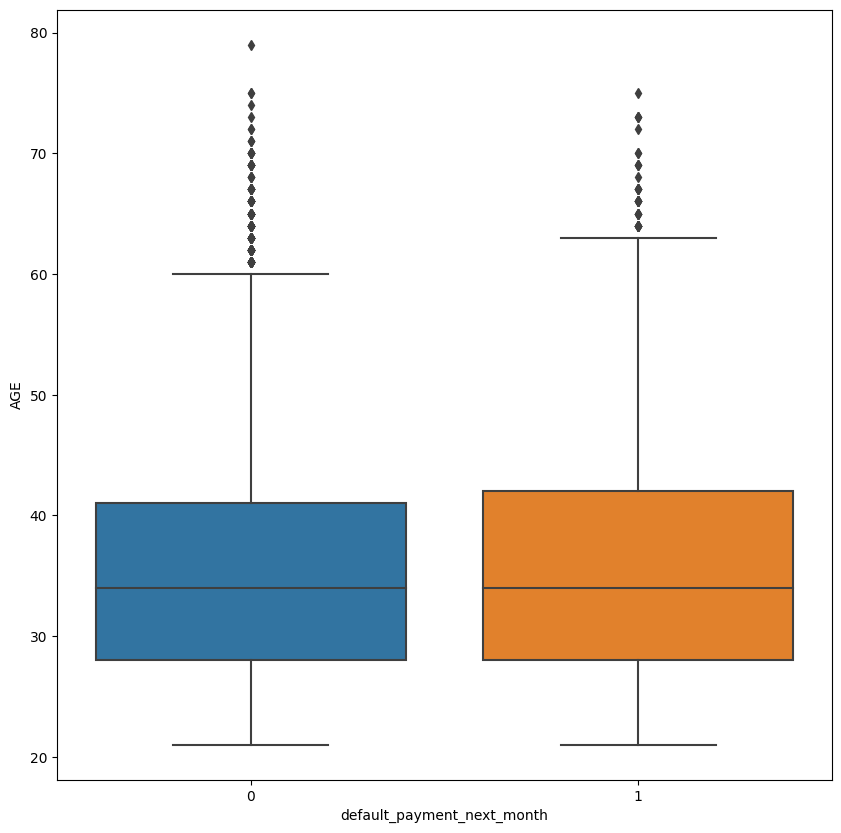

In [35]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default_payment_next_month", y="AGE", data=cc_df)

**Limit balance**

In [36]:
cc_df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='LIMIT_BAL', ylabel='count'>

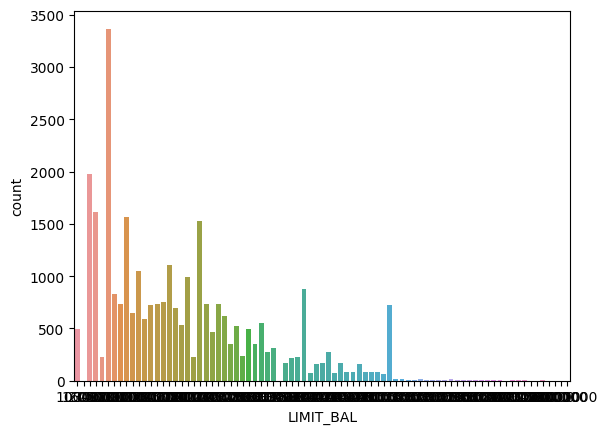

In [37]:
#Plotting the Limit balance
sns.countplot(x=cc_df.LIMIT_BAL)

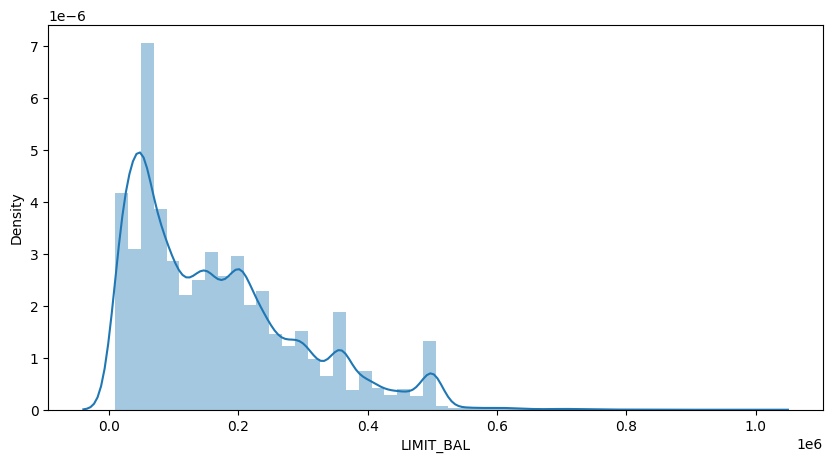

In [38]:
plt.figure(figsize=(10,5))
sns.distplot(cc_df['LIMIT_BAL'], kde=True)
plt.show()

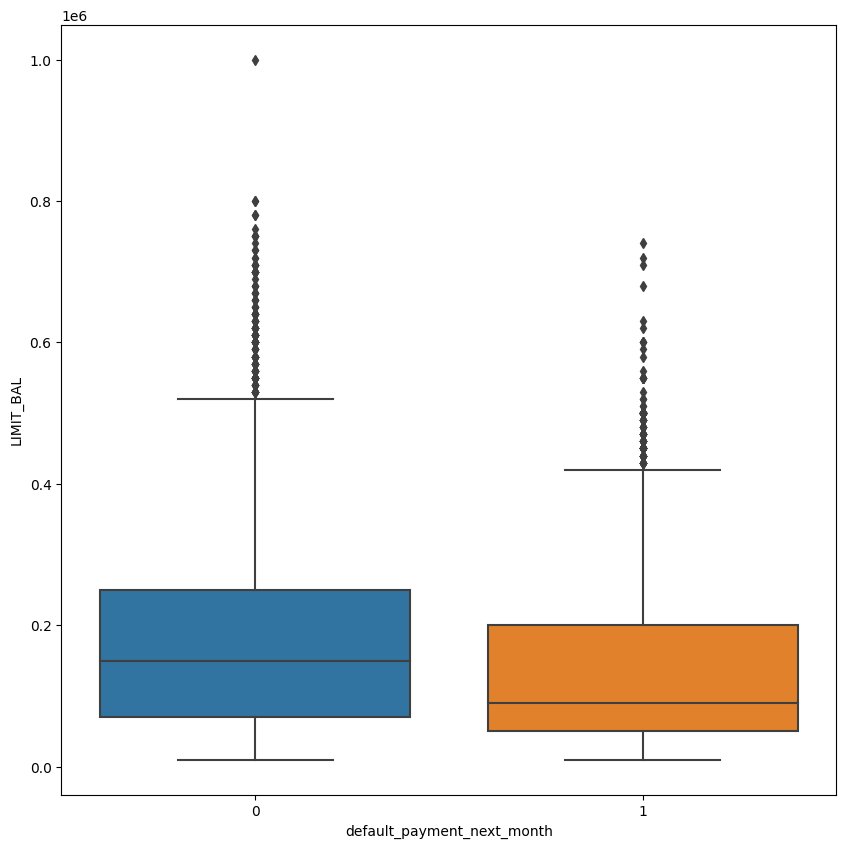

In [39]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default_payment_next_month", y="LIMIT_BAL", data=cc_df)

**Renaming columns**

In [40]:
#renaming columns

cc_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
cc_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
cc_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}, inplace = True)

In [41]:
#check details about the data set
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_SEPT                    30000 non-null  int64
 7   PAY_AUG                     30000 non-null  int64
 8   PAY_JUL                     30000 non-null  int64
 9   PAY_JUN                     30000 non-null  int64
 10  PAY_MAY                     30000 non-null  int64
 11  PAY_APR                     30000 non-null  int64
 12  BILL_AMT_SEPT               30000 non-null  int64
 13  BILL_AMT_AUG                30000 non-null  int64
 14  BILL_A

In [42]:
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Bill amount**

In [43]:
total_bill_amnt_df = cc_df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]

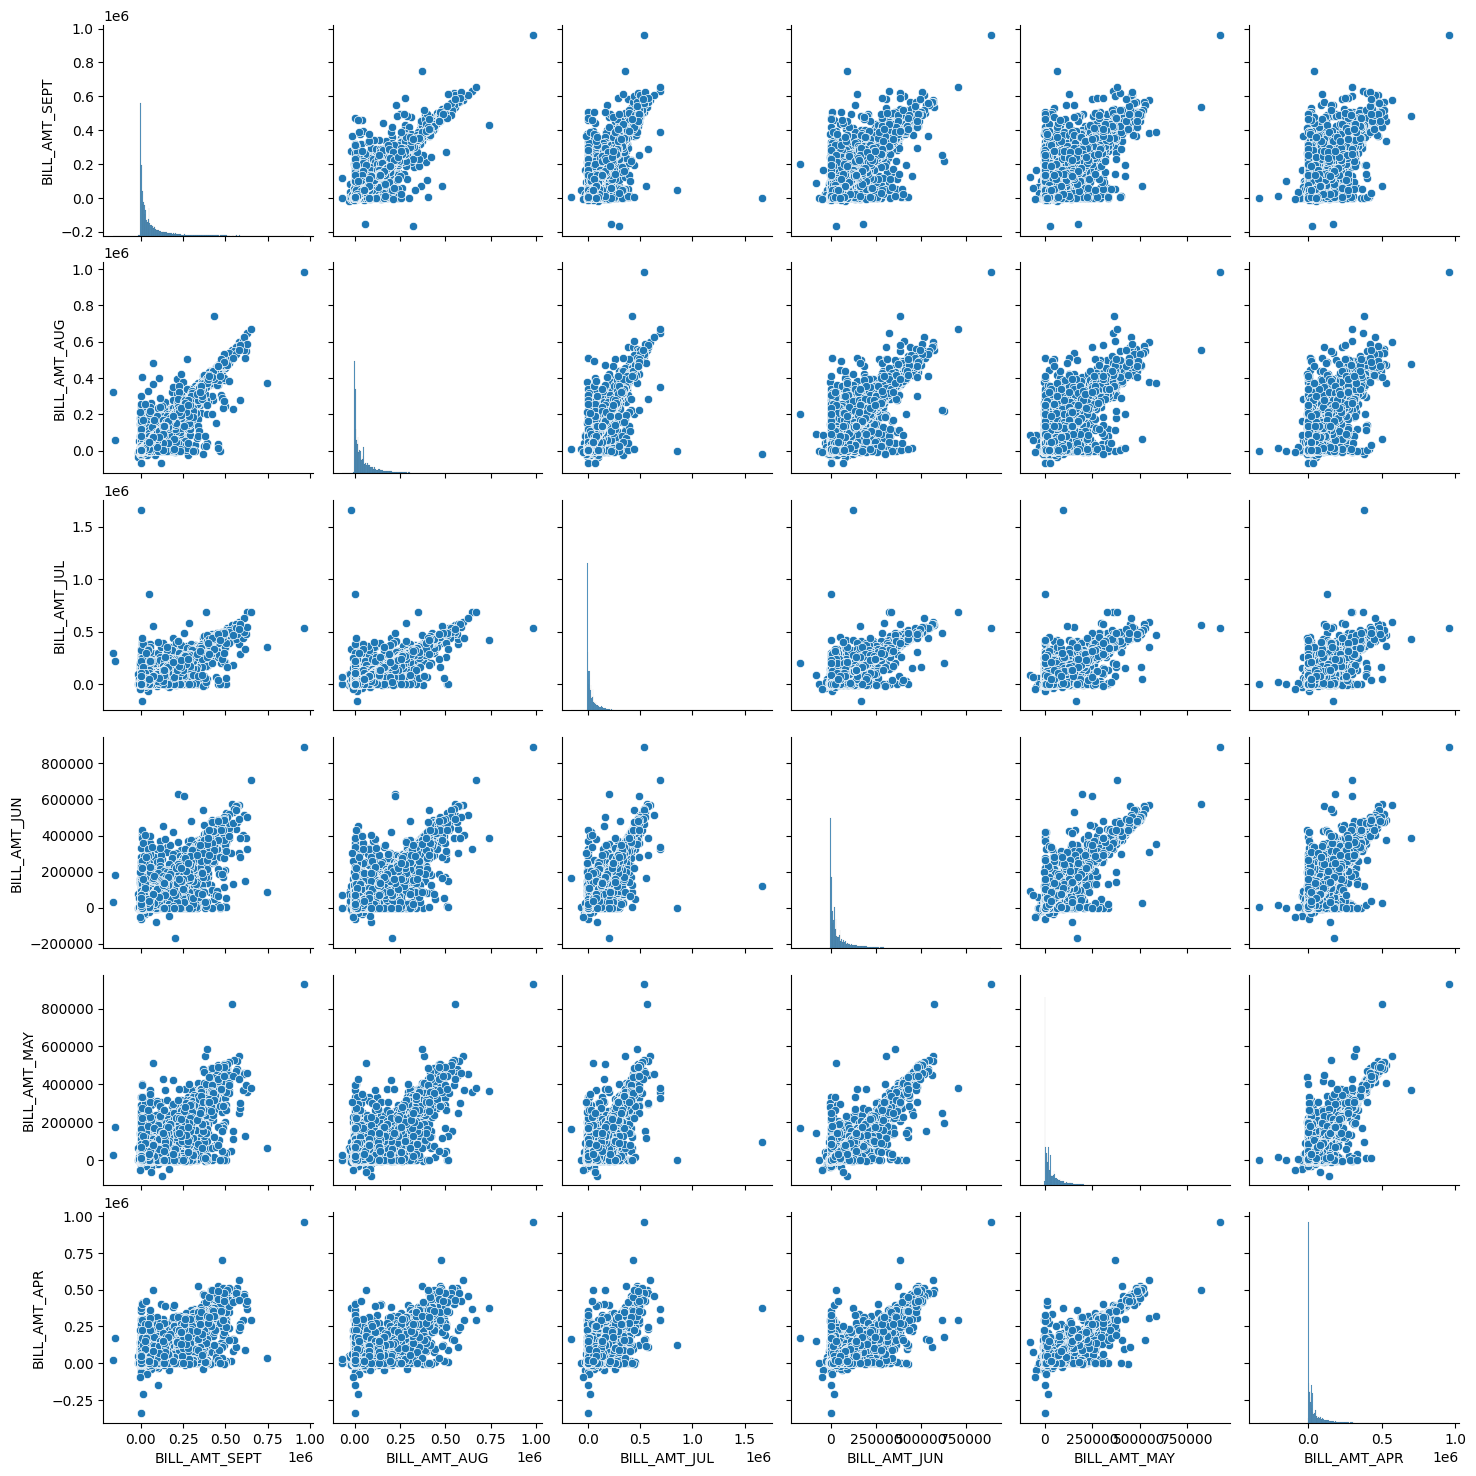

In [42]:
#plotting the pair plot for bill amount
sns.pairplot(data = total_bill_amnt_df)

**Payment Status**

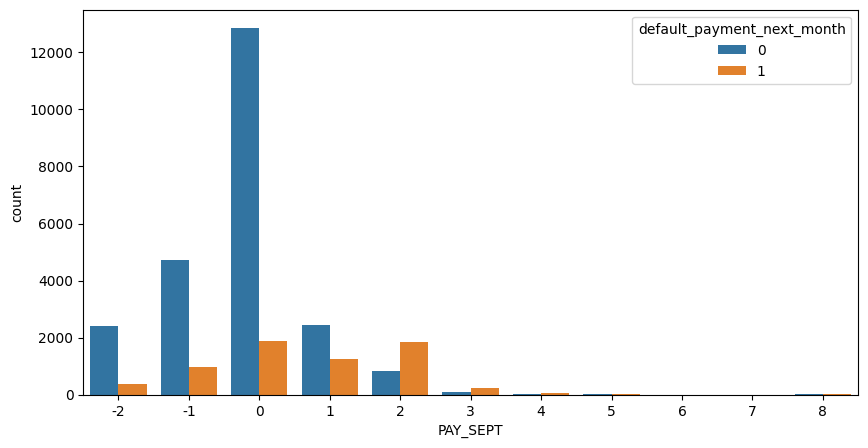

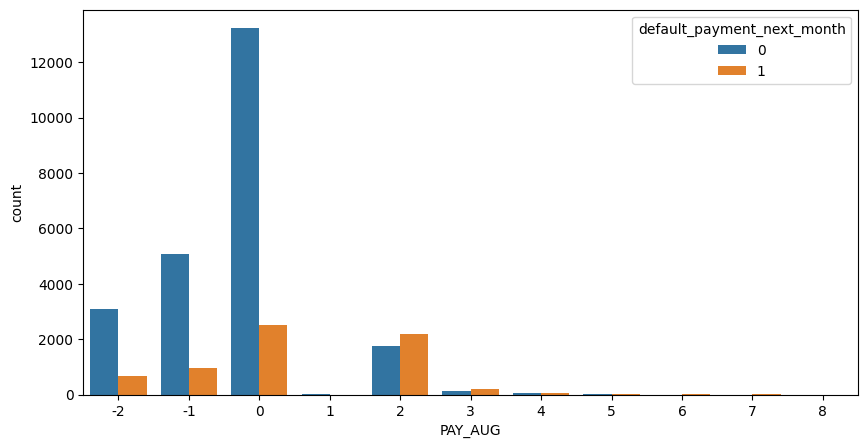

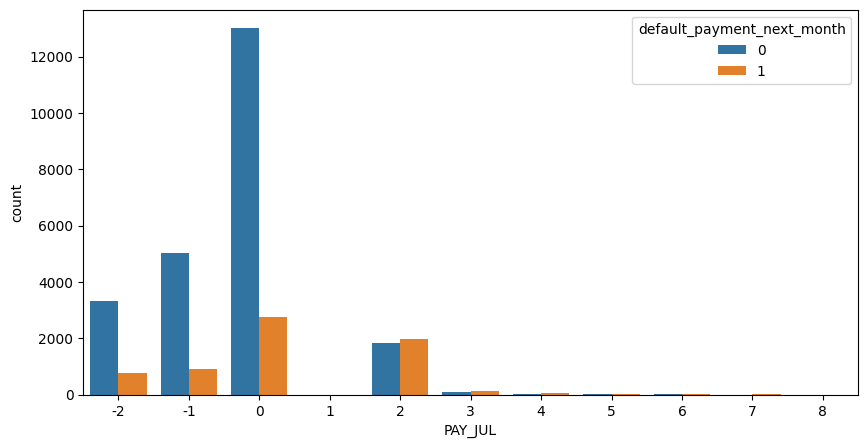

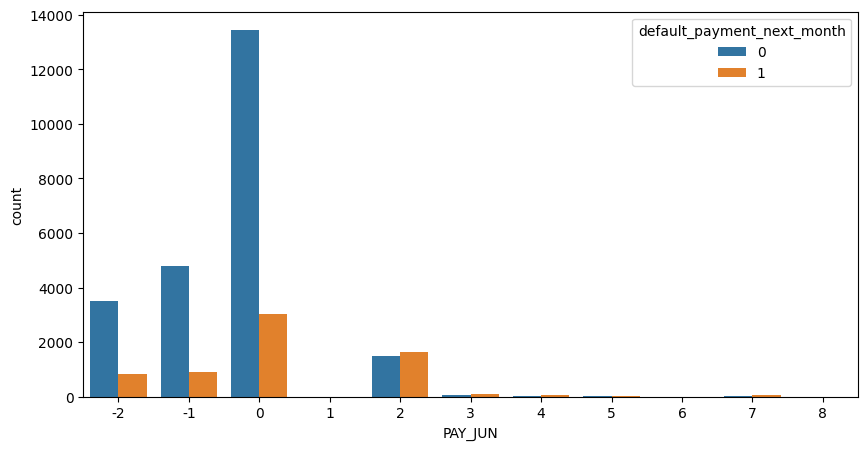

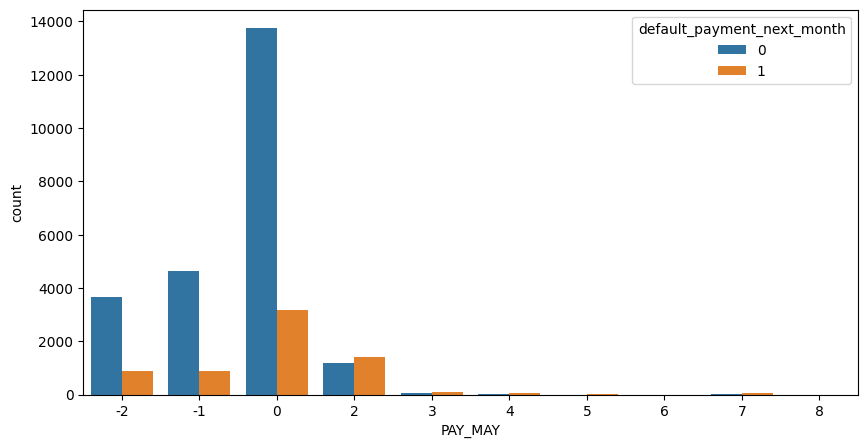

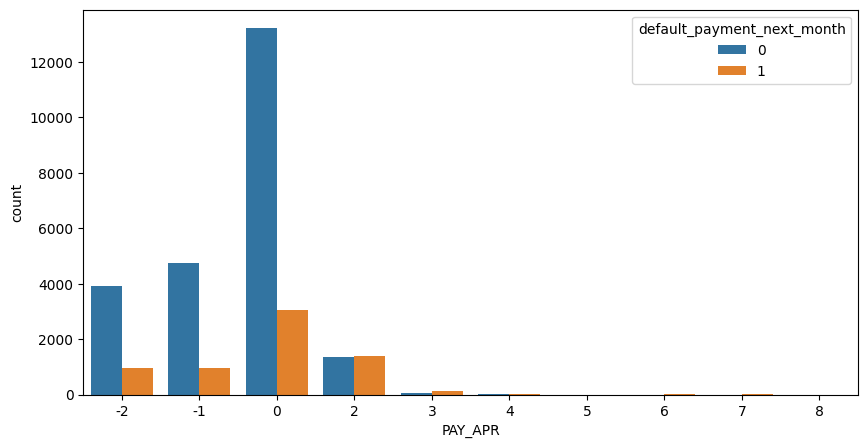

In [44]:
#plotting the count plot for Previous payment status
pre_payment = ['PAY_SEPT', 'PAY_AUG',	'PAY_JUL', 'PAY_JUN',	'PAY_MAY', 'PAY_APR']
for col in pre_payment:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default_payment_next_month', data = cc_df)

**Bivariate Analysis**




**Sex and default_payment_next_month**

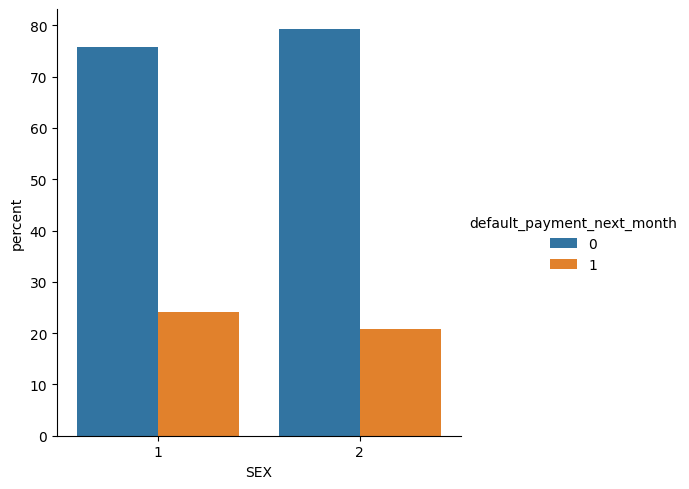

In [45]:
x,y = 'SEX', 'default_payment_next_month'

(cc_df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

the number of defaulter have high proportion of males.

**Marriage and default_payment_next_month**

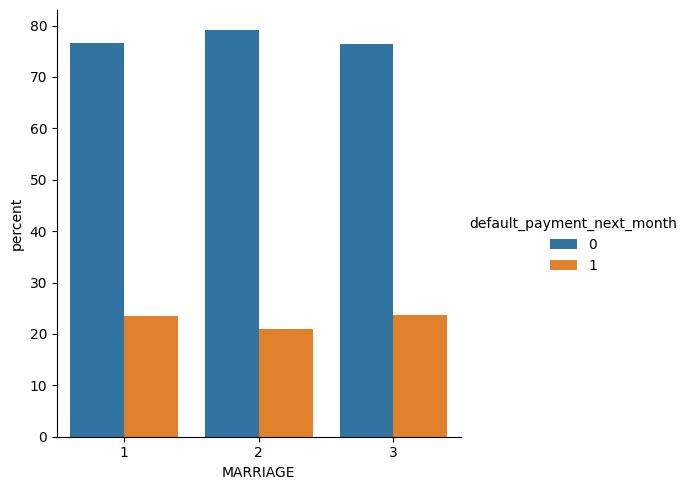

In [46]:
x,y = 'MARRIAGE', 'default_payment_next_month'

(cc_df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

**Age and default_payment_next_month**

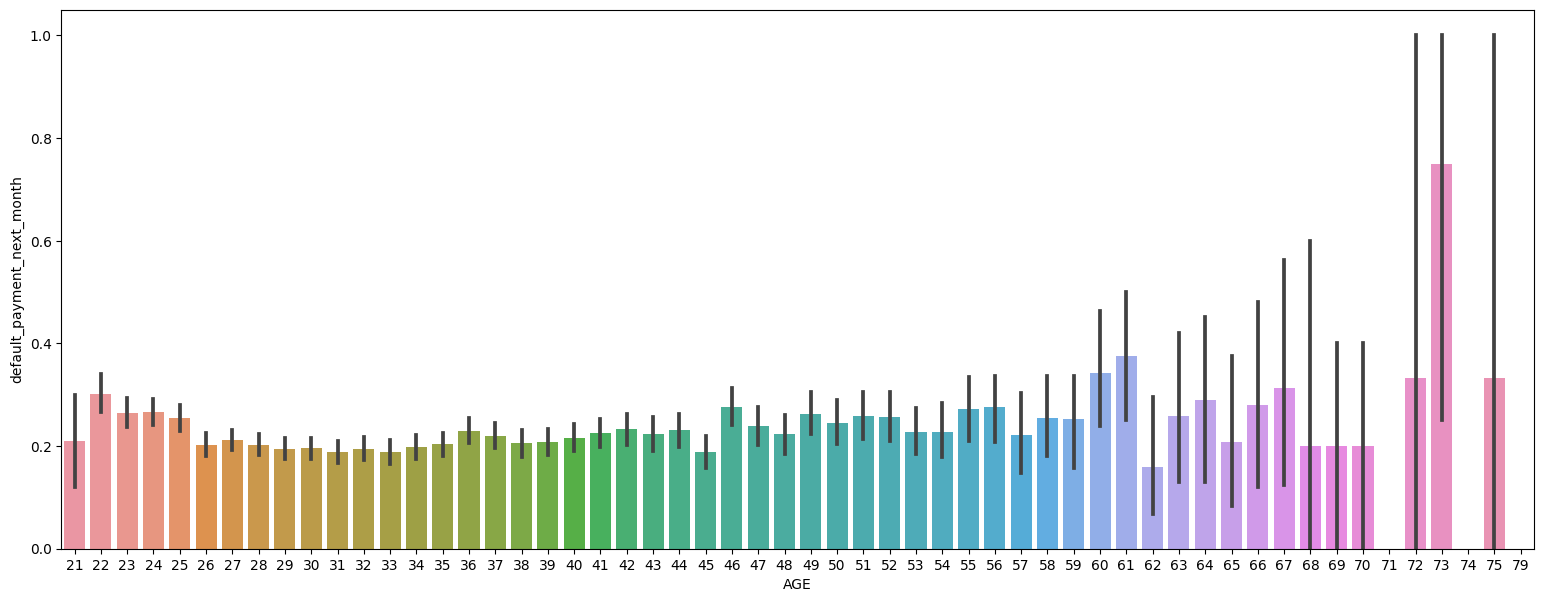

In [47]:
plt.figure(figsize=(19,7))
sns.barplot(x = 'AGE', y = 'default_payment_next_month', data = cc_df)

plt.show()

Slightly higher defaulter rate in 60+

**Correlation of Features**

<Axes: title={'center': 'Correlation of Features'}>

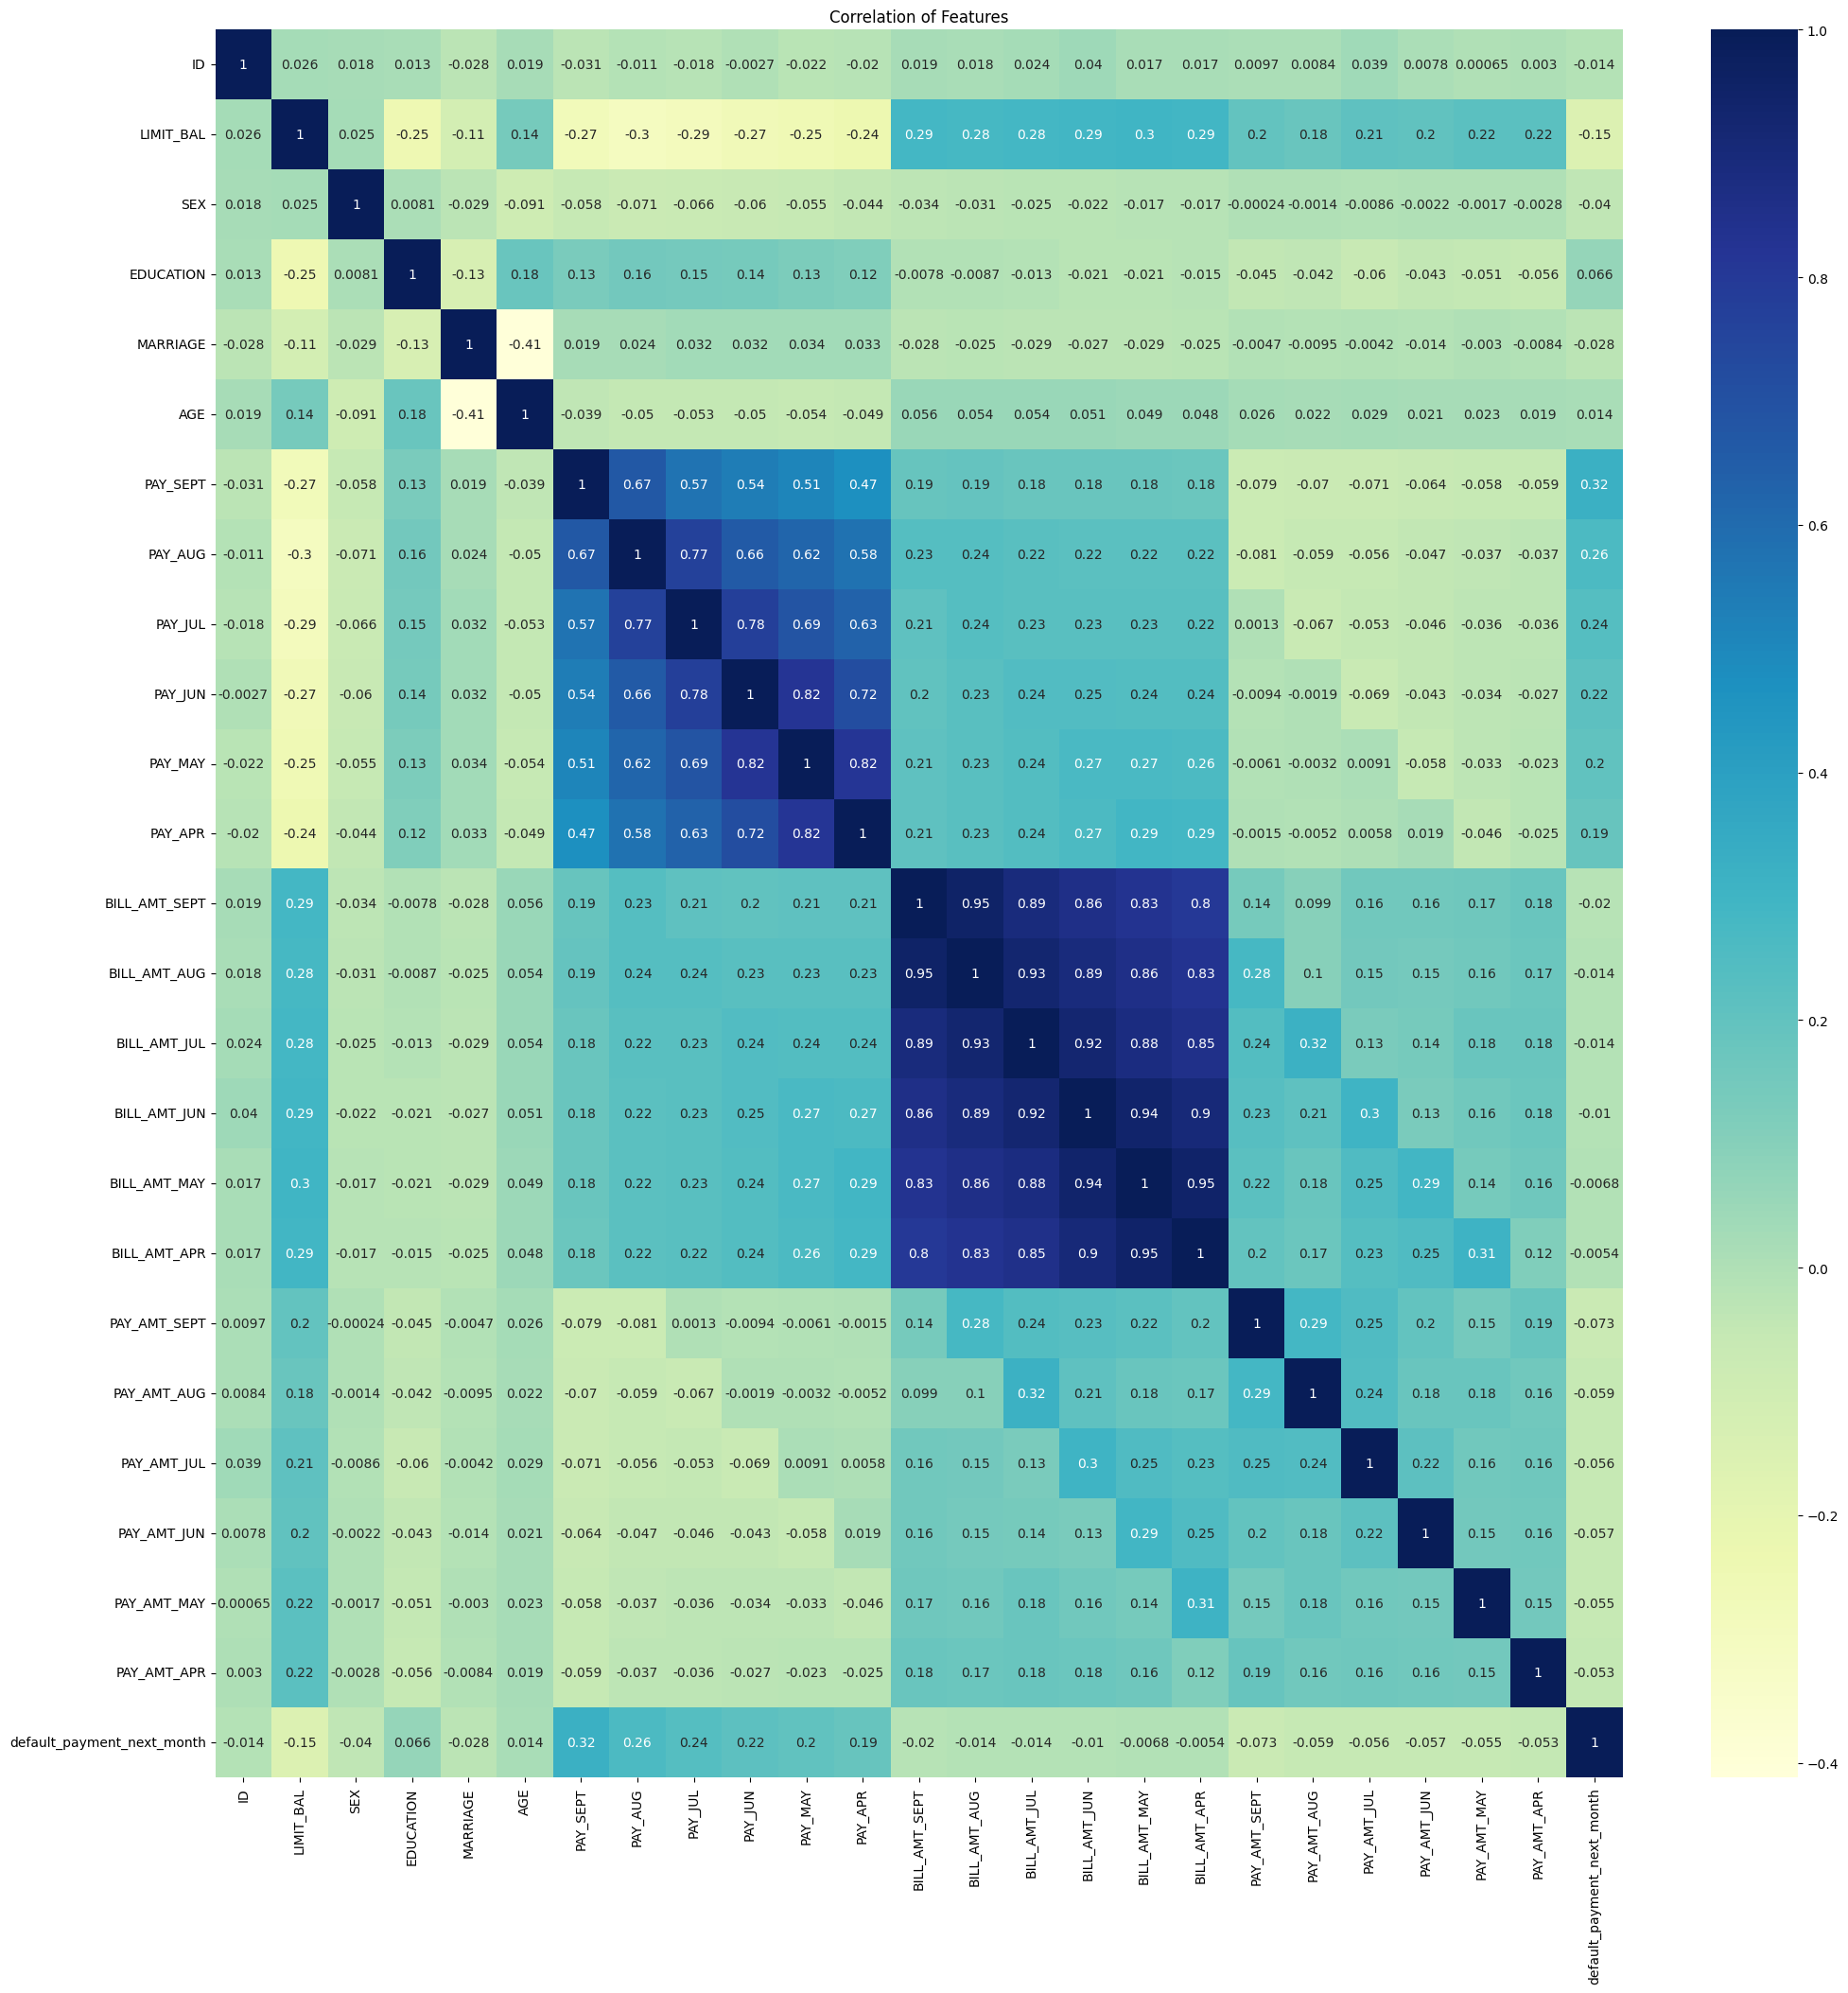

In [49]:
#Finding the correlation among features
plt.subplots(figsize=(24,24))
plt.title("Correlation of Features")
sns.heatmap(cc_df.corr(),cmap='YlGnBu', annot=True)

**Observations**

From this correlation heatmap there we can see that some of the values are negatively correlated . like age , but we can't delete age because it is an important feature for further prediction

The column ID also have some negative values it is not that much important for analysis , so we can remove it.

# **Handling imbalanced dataset**

As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique

SMOTE (Synthetic Minority Oversampling Technique) – Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [50]:
#import the module
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(cc_df.iloc[:,0:-1], cc_df['default_payment_next_month'])

print('Original dataset shape', len(cc_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [51]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,12135,40202,1,1,1,25,0,-1,0,0,...,3026,461,2457,418,17826,2834,0,2412,0,16839
46724,29135,359930,1,2,1,60,1,0,0,0,...,303382,260137,263230,268442,13864,11645,12299,9475,9663,9794
46725,5380,200000,2,2,1,38,-1,-1,0,-1,...,2434,761,219,561,4975,1500,761,0,561,0
46726,5854,88819,1,2,1,44,1,0,0,-1,...,19907,1739,611,2990,1340,4558,6153,615,2993,432


In [52]:
columns = list(cc_df.columns)

In [53]:
columns.pop()

'default_payment_next_month'

In [54]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [55]:
balance_df['default_payment_next_month'] = y_smote

In [58]:
balance_df[balance_df['default_payment_next_month']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,12135,40202,1,1,1,25,0,-1,0,0,...,461,2457,418,17826,2834,0,2412,0,16839,1
46724,29135,359930,1,2,1,60,1,0,0,0,...,260137,263230,268442,13864,11645,12299,9475,9663,9794,1
46725,5380,200000,2,2,1,38,-1,-1,0,-1,...,761,219,561,4975,1500,761,0,561,0,1
46726,5854,88819,1,2,1,44,1,0,0,-1,...,1739,611,2990,1340,4558,6153,615,2993,432,1


# **FEATURE ENGINEERING**

In [59]:
#save a copy file in other variable
cc_df_copy = balance_df.copy()

In [60]:
#assign the sum of payment value in one
cc_df_copy['total_Payment_Value'] = cc_df_copy['PAY_SEPT'] + cc_df_copy['PAY_AUG'] + cc_df_copy['PAY_JUL'] + cc_df_copy['PAY_JUN'] + cc_df_copy['PAY_MAY'] + cc_df_copy['PAY_APR']

In [61]:
#checking  correlation by using mean
cc_df_copy.groupby('default_payment_next_month')['total_Payment_Value'].mean()

default_payment_next_month
0   -1.980140
1    1.749444
Name: total_Payment_Value, dtype: float64

<Axes: xlabel='default_payment_next_month', ylabel='total_Payment_Value'>

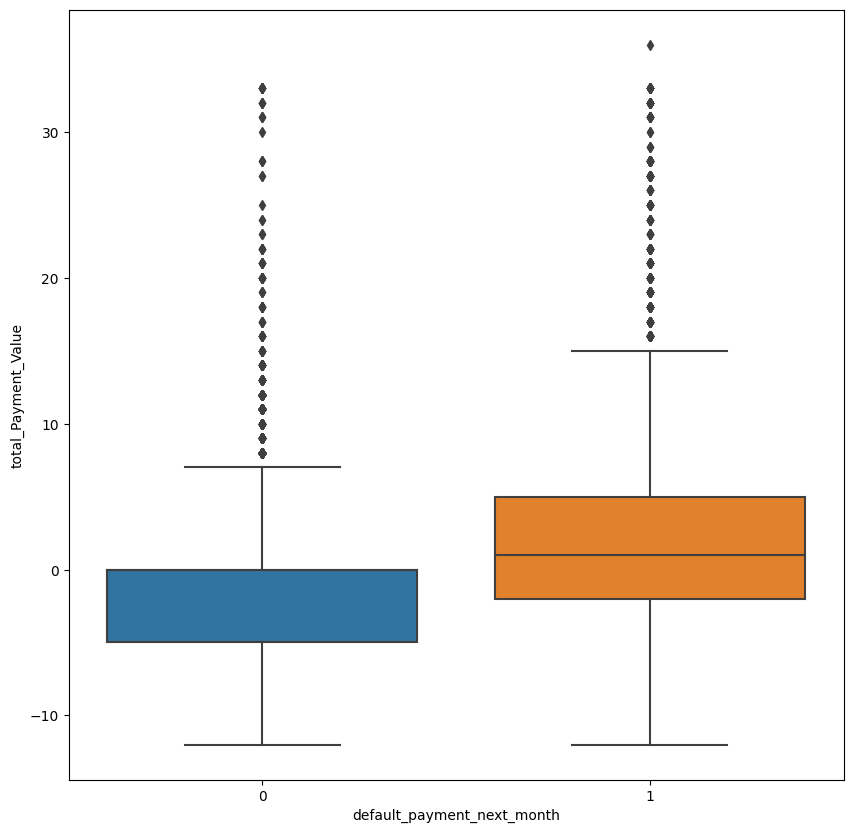

In [62]:
#plotting the box plot
plt.figure(figsize=(10,10))
sns.boxplot(data = cc_df_copy, x = 'default_payment_next_month', y = 'total_Payment_Value' )

Lets create a copy of our dataset for further processing

In [63]:
#create a new column due by calculating the sum of total bill amount substract it from the total amont paid
cc_df_copy['Dues'] = (cc_df_copy['BILL_AMT_APR']+cc_df_copy['BILL_AMT_MAY']+cc_df_copy['BILL_AMT_JUN']+cc_df_copy['BILL_AMT_JUL']+cc_df_copy['BILL_AMT_AUG']+cc_df_copy['BILL_AMT_SEPT'])

In [64]:
#check the mean to calculate the correletion
cc_df_copy.groupby('default_payment_next_month')['Dues'].mean()

default_payment_next_month
0    272428.907850
1    263831.110598
Name: Dues, dtype: float64

In [65]:
cc_df_copy.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},
                        'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others'},
                        'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [66]:
cc_df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month,total_Payment_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,7704
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,17077
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,101653
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,231334
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,109339


**One Hot Encoding**

In [67]:
cc_df_copy = pd.get_dummies(cc_df_copy,columns=['EDUCATION','MARRIAGE'])

In [68]:
cc_df_copy = pd.get_dummies(cc_df_copy, columns = ['PAY_SEPT', 'PAY_AUG',	'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'])

In [69]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
cc_df_copy = cc_df_copy.replace(encoders_nums)

In [70]:
cc_df_copy.drop('ID',axis = 1, inplace = True)

In [71]:
cc_df_copy.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0


**Preprocessing of training mode**ls

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve


**Train test split**

In [73]:
#make a copy
cc_df_logistic = cc_df_copy.copy()

In [74]:
#define the X and y value
X = cc_df_logistic.drop(['default_payment_next_month','total_Payment_Value','Dues'],axis=1)
y = cc_df_logistic['default_payment_next_month']

In [75]:
columns = X.columns

In [76]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [77]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [78]:
#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [79]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [80]:
optimized_clf = grid_lr_clf.best_estimator_

In [81]:
grid_lr_clf.best_params_

{'C': 1000, 'penalty': 'l2'}

In [82]:
grid_lr_clf.best_score_

0.755645814994586

In [83]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [84]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

**CONFUSION MATRIX**

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.The confusion matrix consists of four basic characteristics (numbers) that are used to define the measurement metrics of the classifier.

TP (True Positive): TP represents the number of patients who have been properly classified to have malignant nodes, meaning they have the disease.

TN (True Negative): TN represents the number of correctly classified patients who are healthy.

FP (False Positive): FP represents the number of misclassified patients with the disease but actually they are healthy. FP is also known as a Type I error.

FN (False Negative): FN represents the number of patients misclassified as healthy but actually they are suffering from the disease. FN is also known as a Type II error.

Performance metrics of an algorithm are accuracy, precision, recall, and F1 score, which are calculated on the basis of the above-stated TP, TN, FP, and FN.

**Precision** is a good metric to use when the costs of false positive(FP) is high.

**Precision = TP / (TP + FP)**

**Recall** is a good metric to use when the cost associated with false negative(FN) is high.

**Recall = TP / (TP + FN)**

**F1-score** is a weighted average of precision and recall. Thus, it considers FP and FN. This metric is very useful when we have uneven class distribution, as it seeks a balance between precision and recall.

**F1-score = 2 (precision recall) / (precision + recall)**

**ROC AUC curve**

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

1.True Positive Rate

2.False Positive Rate

AUC stands for "Area under the ROC Curve.AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example

# **Logistic Regression**

Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.

In [85]:
# check the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7569553135081611
The accuracy on test data is  0.7535179300953245


In [86]:
#print the accuracy,precission,recall,f1,roc_score
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7535179300953245
The precision on test data is  0.6881971465629053
The recall on test data is  0.7915858570789199
The f1 on test data is  0.7362797474502185
The roc_score on test data is  0.7579172689845162


**Observations**

while implementing logistic regression we get f1 score is approximately 73% . ie we have imbalenced dataset . F1 score is better parameter .lets check other models ...

In [87]:
# Get the confusion matrix for both train and test
cm_lr = confusion_matrix(y_train, train_class_preds)
print(cm_lr)

[[12827  2826]
 [ 4783 10871]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

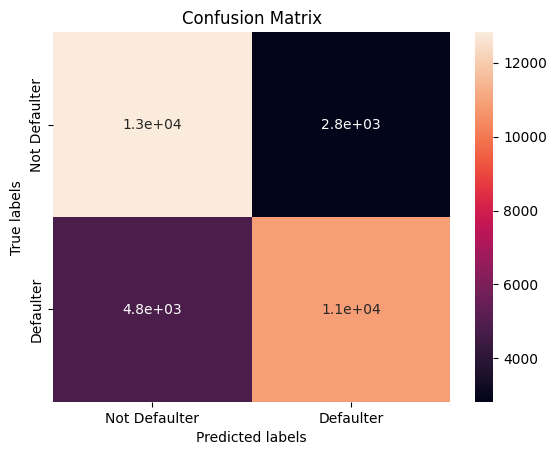

In [88]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cm_lr, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [89]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [90]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

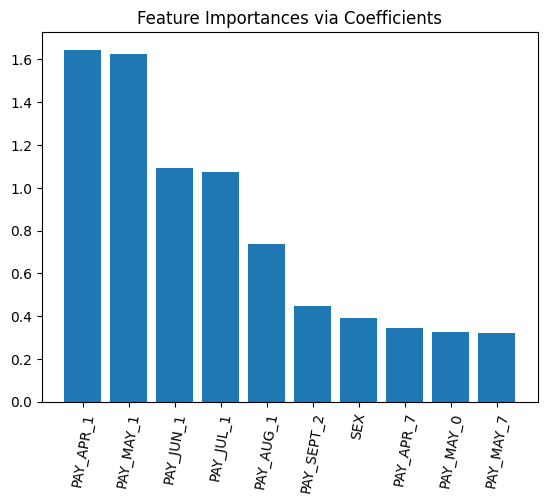

In [91]:
#plotting  the graph
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature Importances via Coefficients")
plt.show()

**Observations**

IMPORTANT VARIABLES THAT CAN MAKE IMPACT ON DEPENDENT VARIABLES ARE PAY_APR_1,PAY_MAY_1,PAY_JUL_1

In [92]:
#ROC AUC curve
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

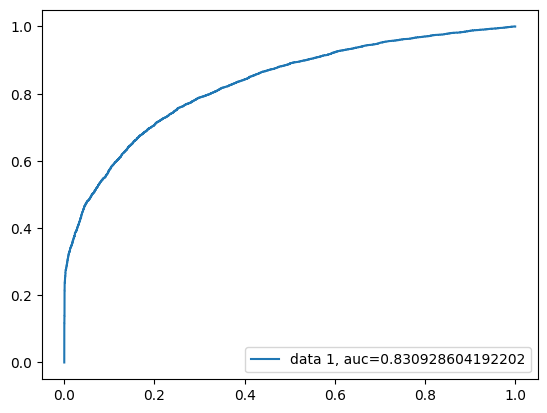

In [93]:
#plot the graph
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

We have implemented logistic regression and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result

# **Random Forest**

A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [94]:
#import the packages
from sklearn.ensemble import RandomForestClassifier

In [95]:
#define the X and y value
X = cc_df_copy.drop(['default_payment_next_month','total_Payment_Value','Dues'],axis=1)
y = cc_df_copy['default_payment_next_month']

In [96]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [97]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [98]:
# CHECK the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9994250487111509
The accuracy on test data is  0.837948252383114


In [99]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.837948252383114
The precision on test data is  0.8111543450064851
The recall on test data is  0.85706454707414
The f1 on test data is  0.8334777104018125
The roc_score on test data is  0.8389212444873408


**Observations**

we get the train accuracy 99% and test accuracy 83% . that means the model is over fitting . also our F1 score is 82% which is a good value

In [100]:
#set the parmeter
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [101]:
#fit the parameter
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [102]:
grid_rf_clf.best_score_

0.8209027925339711

In [103]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [104]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [105]:
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [106]:
#check the accuracy
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.999361165234612
The accuracy on test data is  0.8400881914272745


In [107]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8400881914272745
The precision on test data is  0.8136186770428016
The recall on test data is  0.8590797041906327
The f1 on test data is  0.8357314148681055
The roc_score on test data is  0.8410437318834677


**Observations**

Now we get f1-score is approximately 82% . . As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result

In [108]:
cm_rf = confusion_matrix(y_train, train_class_preds)
print(cm_rf)

[[15644     9]
 [   11 15643]]


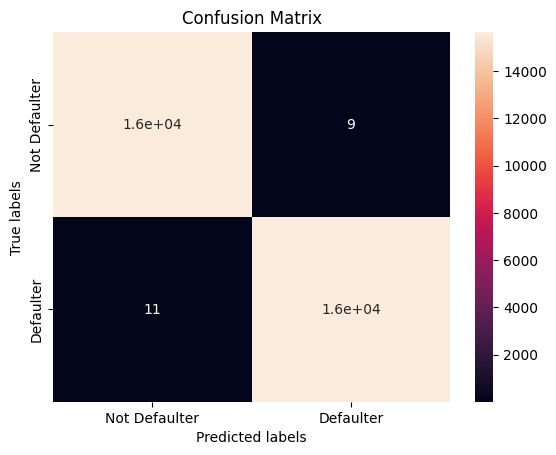

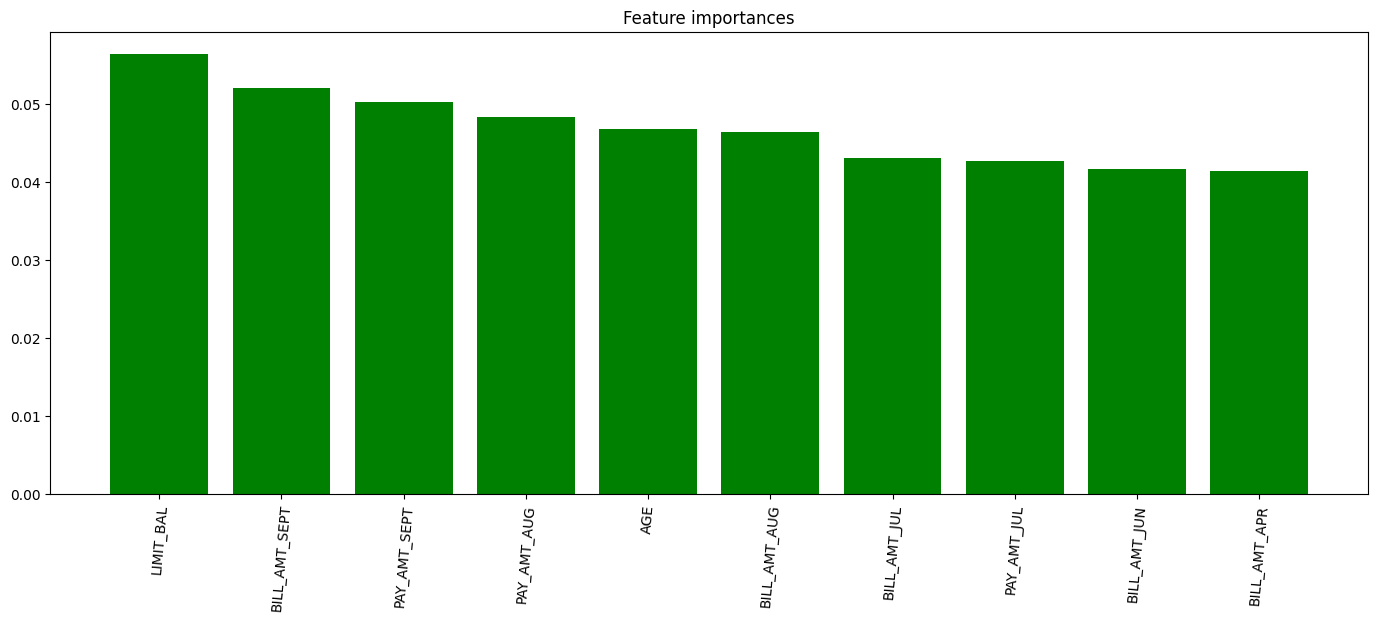

In [109]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]

plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are LIMIT_BAL,PAY_AMT_SEPT

In [110]:
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [111]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

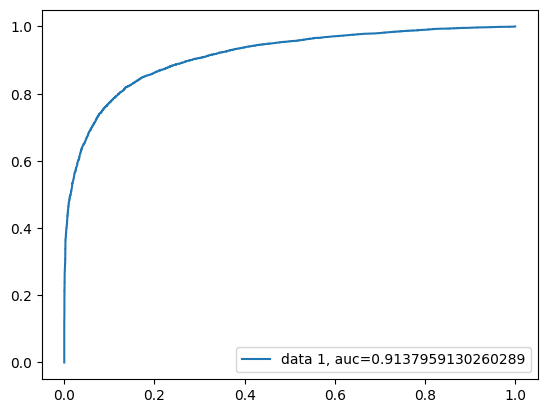

In [112]:
#plot roc auc curve
import sklearn.metrics as metrics
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Support Vector Machine**

The Linear Support Vector Classifier (SVC) method applies a linear kernel function to perform classification and it performs well with a large number of samples. If we compare it with the SVC model, the Linear SVC has additional parameters such as penalty normalization which applies 'L1' or 'L2' and loss function. The kernel method can not be changed in linear SVC, because it is based on the kernel linear method.

In [113]:
cc_df_svc = cc_df_copy.copy()

In [114]:
#import the packages
from sklearn.model_selection import GridSearchCV

In [115]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10,100],
              'kernel': ['rbf']}

In [116]:
#define the X and y value
X = cc_df_svc.drop(['default_payment_next_month','total_Payment_Value','Dues'],axis=1)
y = cc_df_svc['default_payment_next_month']

In [117]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [118]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [119]:
#grid search cv    .. set the parameters
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [121]:
optimal_SVC_clf = grid_clf.best_estimator_

In [122]:
grid_clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [123]:
grid_clf.best_score_

0.7763759746051243

In [124]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [125]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7569553135081611
The accuracy on test data is  0.7535179300953245


In [126]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.7786135788859347
The precision on test data is  0.7199740596627756
The recall on test data is  0.8156038789303556
The f1 on test data is  0.7648112427666024
The roc_score on test data is  0.7824972383624499


**Observations**

from the above results 75%train accuracy and 74%test accuracy which is not bad . but f1- score is 76%

[[13635  2018]
 [ 3920 11734]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

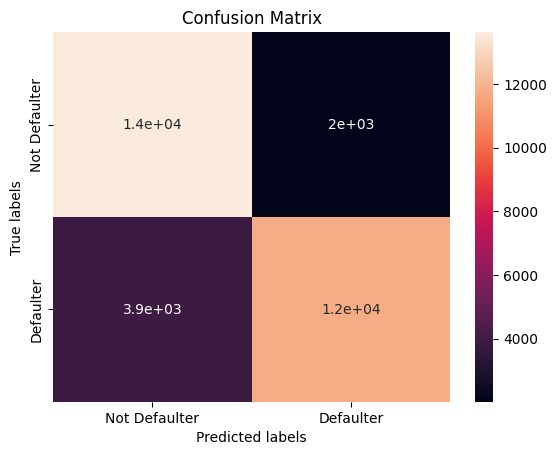

In [127]:
 # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [128]:
optimal_SVC_clf

SVC(C=10, probability=True)

In [129]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [130]:
#ROC AND AUC CURVE

y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

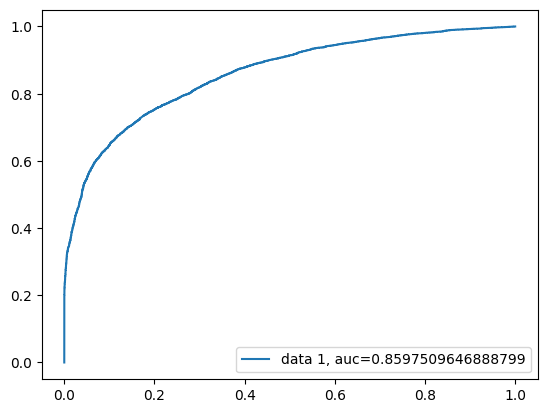

In [131]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **XG BOOST**

### XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library.

In [132]:
#import lightgbm and xgboost
import lightgbm as lgb
import xgboost as xgb

In [133]:
#The data is stored in a DMatrix object
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [134]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [135]:
#training our model
num_round=50
from datetime import datetime
start = datetime.now()
xg=xgb.train(parameters,dtrain,num_round)
stop = datetime.now()

[07:36:42] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [136]:
#Execution time of the model
execution_time_xgb = stop-start
execution_time_xgb

datetime.timedelta(seconds=10, microseconds=53130)

In [137]:
#now predicting our model on train set
train_class_preds_probs=xg.predict(dtrain)
#now predicting our model on test set
test_class_preds_probs =xg.predict(dtest)

In [138]:
len(train_class_preds_probs)

31307

In [139]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [140]:
test_class_preds_probs[:10]

array([0.27032956, 0.24486881, 0.42302534, 0.22353086, 0.24192852,
       0.24501134, 0.20158015, 0.3912868 , 0.6098366 , 0.2972464 ],
      dtype=float32)

In [141]:
len(y_train)

31307

In [142]:
len(train_class_preds)

31307

In [143]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.79036637173795
The accuracy on test data is  0.7800402049153752


In [144]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.7800402049153752
The precision on test data is  0.7134889753566797
The recall on test data is  0.8230101735487731
The f1 on test data is  0.7643462553841879
The roc_score on train data is  0.7850886967091468


In [145]:
# Get the confusion matrix for both train and test
cm_xg = confusion_matrix(y_train, train_class_preds)
print(cm_xg)

[[13462  2191]
 [ 4372 11282]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

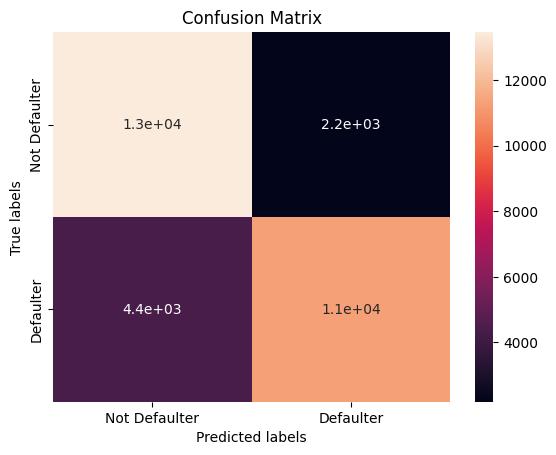

In [146]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cm_xg, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **HYPERPARAMETER TUNING**

GridSearchCV is a library function that is a member of sklearn model_selection package. It helps to loop through predefined hyperparameters and fit our estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.

Hyperparameters are crucial as they control the overall behaviour of a machine learning model. The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.

In [147]:
#import the packages
from xgboost import  XGBClassifier

In [148]:
#define the X and y value
X = cc_df_copy.drop(['default_payment_next_month','total_Payment_Value','Dues'],axis=1)
y = cc_df_copy['default_payment_next_month']

In [149]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [150]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [151]:
print(gsearch1.best_score_)

0.8199764351881357


In [152]:
optimal_xgb = gsearch1.best_estimator_

In [153]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [154]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9148113840355192
The accuracy on test data is  0.8297127293949809


In [155]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.8297127293949809
The precision on test data is  0.7900129701686122
The recall on test data is  0.8581290504367427
The f1 on test data is  0.8226634251755809
The roc_score on train data is  0.8318039220704679


In [156]:
pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

,importance_xgb
PAY_AUG_1,0.145216
PAY_JUL_1,0.136983
PAY_AUG_2,0.090323
PAY_JUN_1,0.051619
PAY_SEPT_2,0.046825
PAY_APR_1,0.040822
SEX,0.036808
PAY_MAY_1,0.036380
PAY_SEPT_1,0.026857
MARRIAGE_married,0.025256


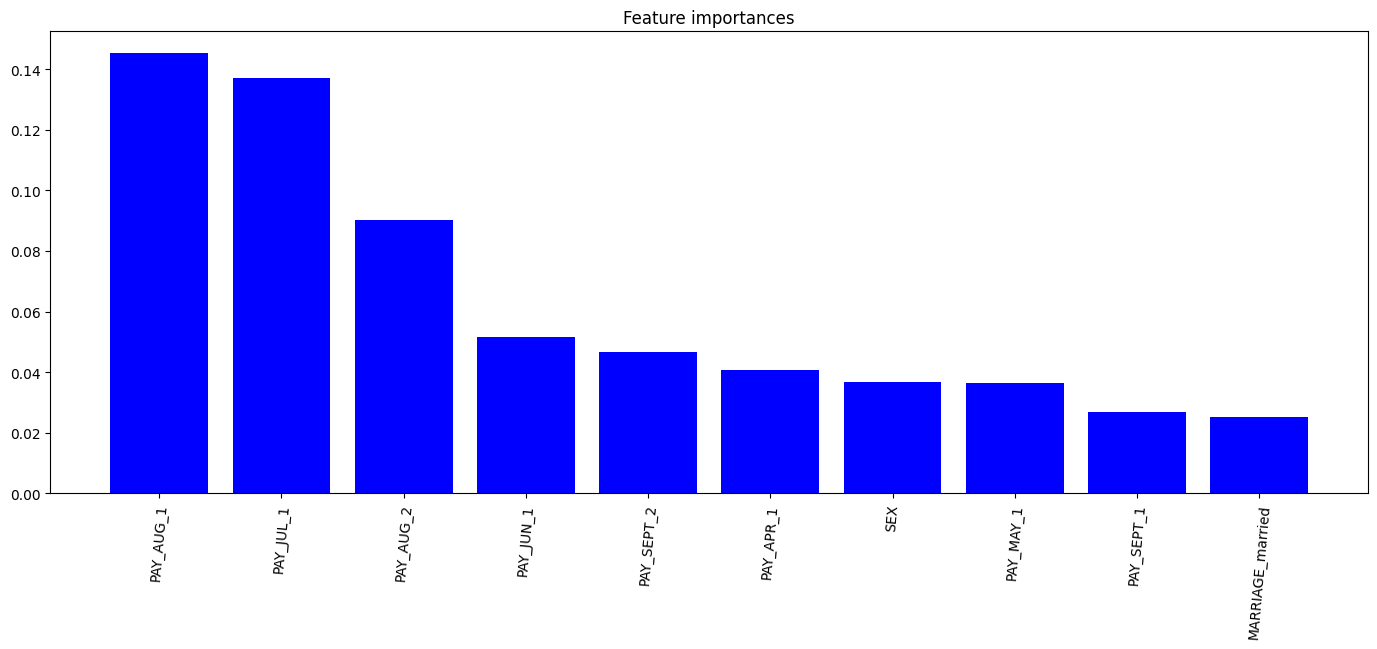

In [157]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [158]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

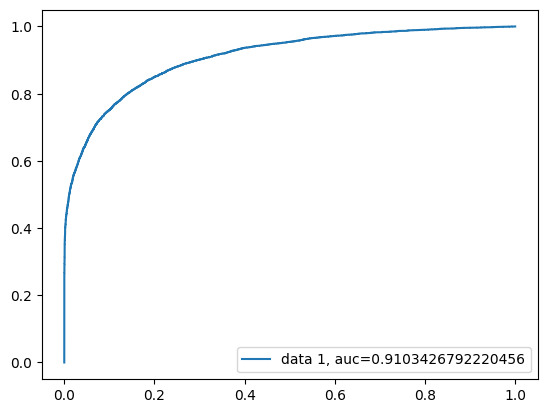

In [159]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Evaluating the Models**

In [160]:
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [168]:
#create a table of all models all score for comparison
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [162]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score})

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.756955,0.753518,0.688197,0.791586,0.736280
1,SVC,0.810330,0.778614,0.719974,0.815604,0.764811
2,Random Forest CLf,0.999361,0.840088,0.813619,0.859080,0.835731
3,Xgboost Clf,0.914811,0.829713,0.790013,0.858129,0.822663


Observations

from the above models , we can understand that , Xgboost classifier performs best among those models.

# **ROC and AUC of all models**

In [163]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr),
               (optimal_rf_clf, y_preds_proba_rf),
               (optimal_xgb, y_preds_proba_xgb),
               (optimal_SVC_clf,y_pred_proba_SVC)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:

    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])

    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

print(result_table)

                                                                      fpr  \
classifiers                                                                 
LogisticRegression      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
RandomForestClassifier  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
XGBClassifier           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
SVC                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00012968...   

                                                                      tpr  \
classifiers                                                                 
LogisticRegression      [0.0, 0.00025940337224383917, 0.00051880674448...   
RandomForestClassifier  [0.0, 0.03813229571984436, 0.03826199740596628...   
XGBClassifier           [0.0, 0.00012970168612191958, 0.00077821011673...   
SVC                     [0.0, 0.00012970168612191958, 0.09753566796368...   

                             auc  
classifiers                       
Logi

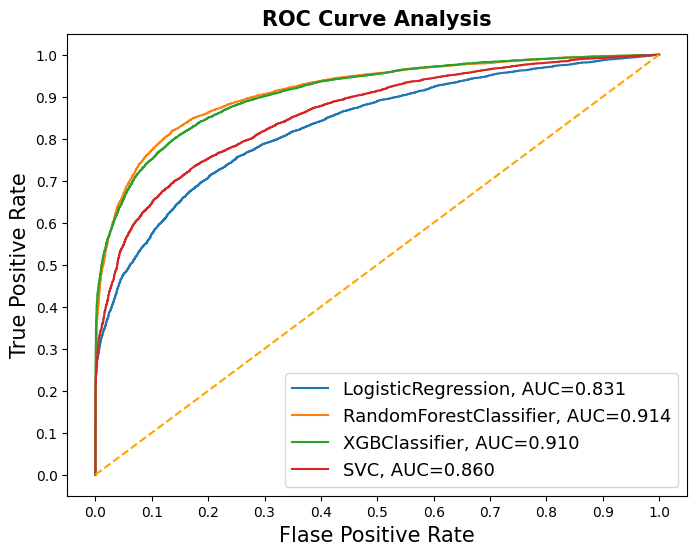

In [164]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

**Model recommendation**

We recommend recall = 0.8, however, the threshold can be adjusted to reach higher recal

In [172]:
# Compute precision, recall and threshold of Random Forest

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

recalls_80 = recalls[np.argmin(recalls >= 0.80)]               # Recommend recall score = 0.8
precision_80 = precisions[np.argmin(recalls >= 0.80)]
threshold_80_recall = thresholds[np.argmin(recalls >= 0.80)]

thresholds = np.append(thresholds, 1)

recalls_80, precision_80, threshold_80_recall

(0.7998702983138781, 0.8507380328321148, 0.48357853)

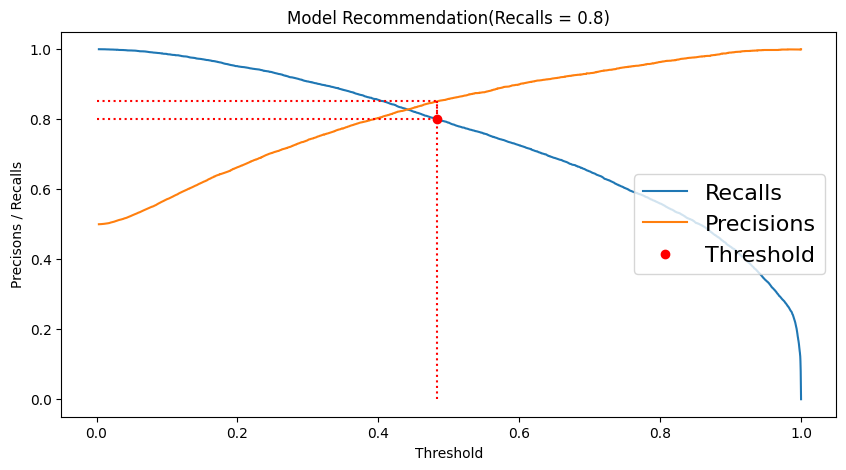

In [173]:
# Plot recommended recall = 0.8

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(thresholds, recalls, label='Recalls')
ax.plot(thresholds, precisions, label='Precisions')

ax.plot([threshold_80_recall, threshold_80_recall], [precision_80, recalls_80], "r:" )
ax.plot([threshold_80_recall, threshold_80_recall], [0, precision_80], "r:")
ax.plot([0, threshold_80_recall], [precision_80, precision_80], "r:")
ax.plot([0, threshold_80_recall], [recalls_80, recalls_80], "r:")
ax.plot([threshold_80_recall], [recalls_80], "ro", label='Threshold')

ax.set_xlabel('Threshold')
ax.set_ylabel('Precisons / Recalls')
ax.legend(loc='center right',fontsize=16)
plt.title('Model Recommendation(Recalls = 0.8)')
plt.savefig('recommended_recall')
plt.show()

Text(0.5, 1.0, 'Features importance')

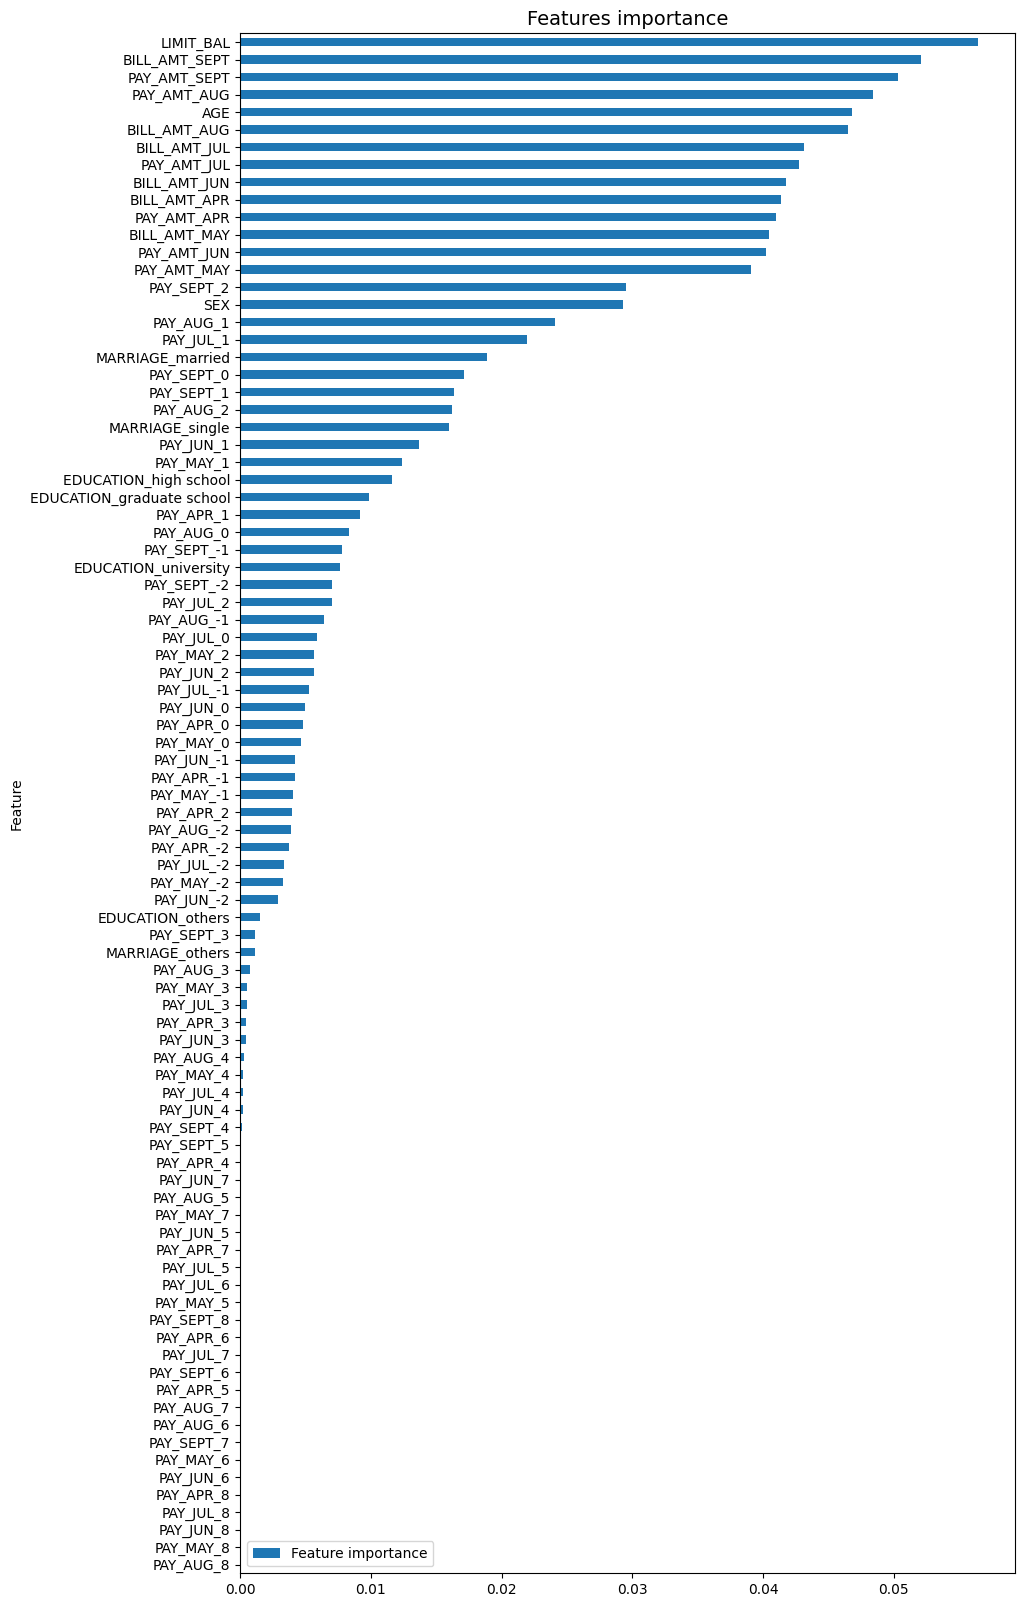

In [174]:
fea_df = pd.DataFrame({'Feature': columns, 'Feature importance': optimal_rf_clf.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,20))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)

LIMT_BAL","BILL_AMT_SEPT" AND "PAY_AMT_SEPT" are the most recent 2 months' payment status and they are the strongest predictors of future payment default risk

# **CONCLUSION**

We have predicted the defaulters using multiple models in this project.We have used Logistical regression, Random forest, XGBoost, SVM. We have also used GridSearchCV to tune hyperparameters.

1. In conclusion , we can conclude that xGboost is the best model for the present problem.

2. We have predicted the defaulters using multiple models in this project.We have used Logistical regression, Decision Tree, XGBoost, SVM. We have also used GridSearchCV to tune hyperparameters. Logistic Regression, xgboost,svm, Random Forest algorithms were implemented. The important metric to compare all the algorithms in this case is ‘Recall’. As the company can’t afford to predict False negative i.e. predict defaulter as a non defaulter. Since, company is one, who will give to money to the customers,if, for any reason giving money to defaulter is gaining more risk to getting the investment back. Hence, here identifying false negative is important.

3. We have also seen the class imbalance so we did SMOTE to handle imbalance.

4. We did train test split and stratify the target variable.

5. We conclude that out of all models XGBoost performed well with roc auc score of 0.832.

6. The best accuracy is obtained for the Random forest and XGBoost classifier.

7. XGboost model solves the problem with high accuracy than others. It has the precision, recall ,F!-score and ROC Score scores of 79% , 85% , 82% and 83% respectively, which is the highest among other models.

8. The next best models are the Random Forest classifier , it has the precision, recall ,F!-score and ROC Score scores of 80% , 85% , 83% and 83% respectively

In [ ]:
#THANK YOU